In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#suppress the warnings:
from warnings import filterwarnings
filterwarnings('ignore')

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split

In [12]:
#load the iris dataset
iris = datasets.load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
X = iris.data
X.shape

(150, 4)

<Figure size 1000x800 with 0 Axes>

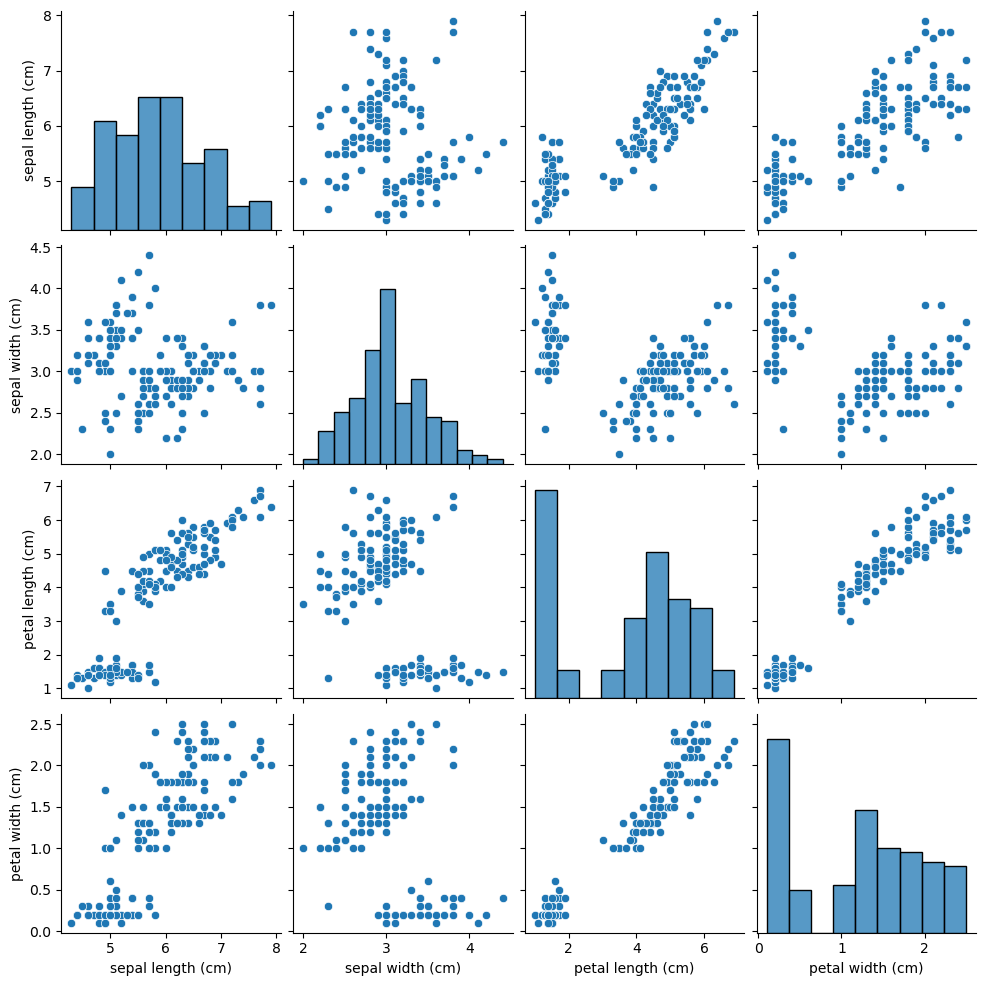

In [23]:
#understanding the data using pairplot()
X_df = pd.DataFrame(X,columns = iris.feature_names)
plt.figure(figsize=(10,8))
sns.pairplot(data=X_df)
plt.show()

In [24]:
X_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Steps invovled in PCA
- Standardize the data
- Calculate the covariance matrix
- Calculate the eigenvectors and the eigenvalues of the covariance matrix
- Rank the eigenvectors by its corresponding eigenvalues and obtain the principal components with its column vectors corresponding to the top k eigenvectors

### Step1 - Normalize the data

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std= scaler.fit_transform(X_df)
X_std

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### Step-2 Calculate the Covariance matrix

In [26]:
cov_mat= np.cov(X_std.T)
print(cov_mat.shape)
cov_mat

(4, 4)


array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

### Step-3 Calculate the eigen vectors and eigen values 

In [27]:
eig_vals,eig_vect = np.linalg.eig(cov_mat)

In [28]:
eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [29]:
eig_vect

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [34]:
eigen_pairs = [(np.abs(eig_vals[i]),eig_vect[:,i]) for i in range(len(eig_vals))]

In [37]:
eigen_pairs_sorted = sorted(eigen_pairs,reverse = True)
eigen_pairs_sorted

[(2.9380850501999936,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.920164904162487,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.14774182104494776,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.02085386217646217,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [39]:
eigen_vals_sorted = [eigen_pairs_sorted[i][0] for i in range(len(eigen_pairs_sorted))]
eigen_vect_sorted = [eigen_pairs_sorted[i][1] for i in range(len(eigen_pairs_sorted))]

In [40]:
sum(eigen_vals_sorted)

4.02684563758389

In [44]:
#cumulative variance explained
tot = sum(eigen_vals_sorted)
var_exp = [(i/tot)*100 for i in eigen_vals_sorted]
cum_variance = np.cumsum(var_exp)
cum_variance

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

In [120]:
eigen_vals_sorted

[2.9380850501999936,
 0.920164904162487,
 0.14774182104494776,
 0.02085386217646217]

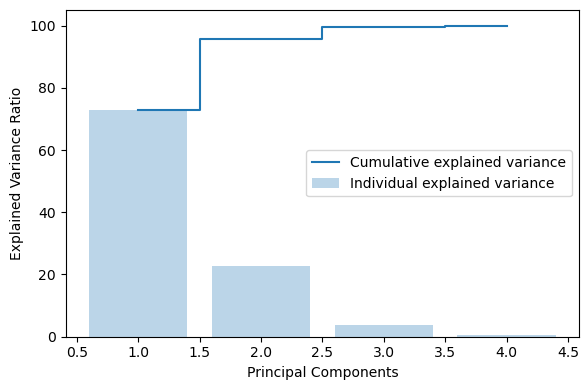

In [50]:
#plot for cumulative variance explained
plt.figure(figsize=(6 , 4))
plt.bar(range(1,5),var_exp,align='center',alpha = 0.3,label='Individual explained variance')
plt.step(range(1,5),cum_variance,where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### Inference:
The first three principal components explain 99% of the variance in the data and these three PCA will have to be named because they represent composite of original dimensions.

We can also determine the number of PCA components based on how much variation we want the data to explain. Let's say we want to see how many PCA compenents explain 95% of the variance in data. For that we can proceed the following way:

In [54]:
len(cum_variance[cum_variance<96])

2

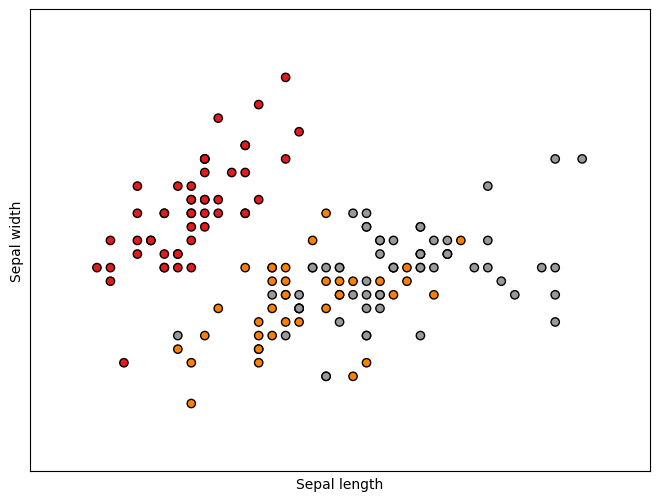

<Figure size 800x600 with 0 Axes>

In [67]:
#Plotting the first 3 principal components of eigen vectors
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

## Get the min and max of the two dimensions and extend the margins by .5 on both sides to get the data points away
## from the origin in the plot

x_min,x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min,y_max = X[:,1].min() -0.5, X[:,1].max()+0.5

#plotting the frame size
plt.figure(2,figsize=(8,6))
plt.clf()

#Plot the training plots (scatter plots with X[:,0] and X[:,1])
plt.scatter(X[:,0],X[:,1],c =y,cmap=plt.cm.Set1,edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


##Plotting the axes with ticks
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig =plt.figure(1,figsize=(8,6))
ax = Axes3D(fig,elev=-150,azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2],c = y,cmap=plt.cm.Set1,edgecolors='k')
ax.set_title('First 3 PCA directions')
ax.set_xlabel('1st Eigen vector')
ax.set_ylabel('2nd Eigen vector')
ax.set_zlabel('3rd Eigen vector')
plt.show()

In [71]:
from mpl_toolkits.mplot3d import Axes3D
fig =plt.figure(1,figsize=(8,6))
ax = Axes3D(fig,elev=-150,azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2],c = y,cmap=plt.cm.Set1,edgecolors='k')
ax.set_title('First 3 PCA directions')
ax.set_xlabel('1st Eigen vector')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('2nd Eigen vector')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('3rd Eigen vector')
ax.w_zaxis.set_ticklabels([])
plt.show()

<Figure size 800x600 with 0 Axes>

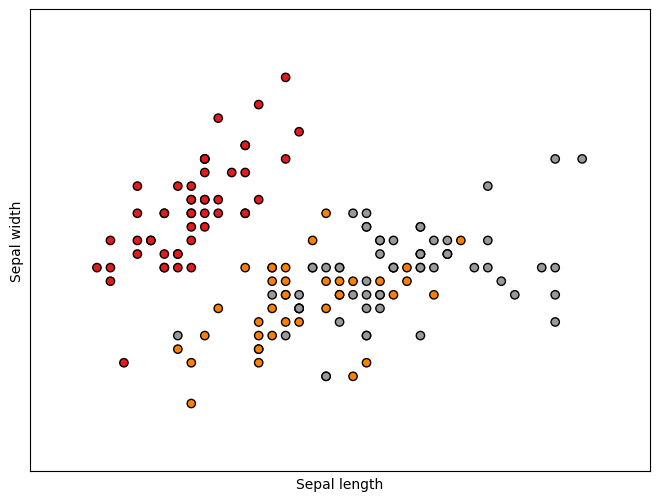

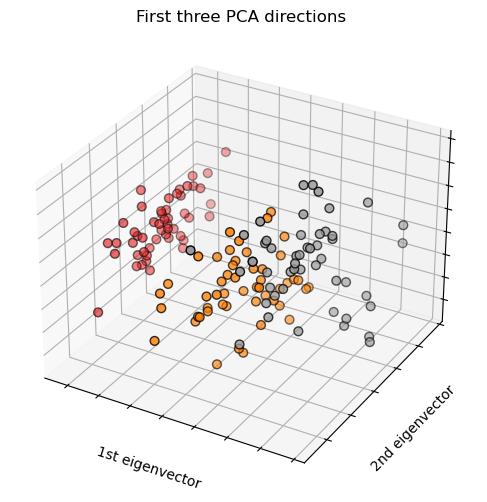

In [101]:
# Plotting the first 3 Eigen Vectors or the Prinicipal components:

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

## Get the min and max of the two dimensions and extend the margins by .5 on both sides to get the data points away
## from the origin in the plot
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

## plot frame size
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points (scatter plot, all rows first and second column only)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


## plotting the axes with ticks
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions

X_reduced = PCA(n_components=3).fit_transform(iris.data)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8,6))
ax.scatter(xs=X_reduced[:,0], ys=X_reduced[:,1], zs=X_reduced[:,2],c=y,cmap =plt.cm.Set1,edgecolor='k',s=40)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
plt.show()

In [102]:
#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [103]:
#scaling the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Building a decision tree algorithm before applying PCA 

In [105]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

#predicting the y values
y_pred_DT = model.predict(X_test)

In [107]:
#checkout the confusion matrix
cm_DT = confusion_matrix(y_test,y_pred_DT)
print('Confusion Matrix')
cm_DT

Confusion Matrix


array([[11,  0,  0],
       [ 0,  7,  6],
       [ 0,  4,  2]], dtype=int64)

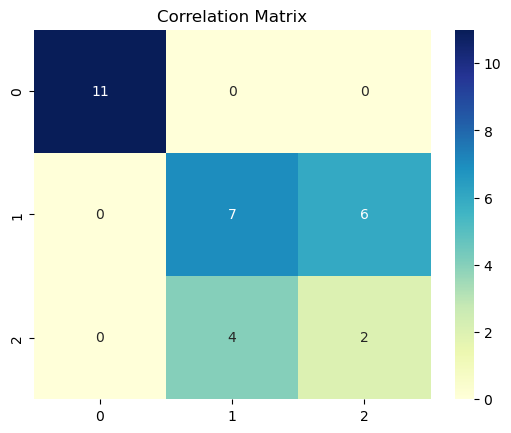

In [109]:
#Plotting the heatmap
sns.heatmap(cm_DT,annot=True,cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

In [112]:
#Classification Report
print('Classification Report')
classification = classification_report(y_test,y_pred_DT)
print(classification)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.64      0.54      0.58        13
           2       0.25      0.33      0.29         6

    accuracy                           0.67        30
   macro avg       0.63      0.62      0.62        30
weighted avg       0.69      0.67      0.68        30



In [113]:
ac = accuracy_score(y_test,y_pred_DT)
ac

0.6666666666666666

### Building the model using Decision Tree after applying PCA

In [132]:
# splitting the data into test and train:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [133]:
# Scaling the data:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [134]:
#Applying PCA
pca = PCA()
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)

In [135]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.53028305, 0.46971695])

In [136]:
pca.explained_variance_

array([1.06947842, 0.94732831])

In [137]:
#creating DT
model2 = DecisionTreeClassifier()
model2.fit(X_train_2,y_train)

DecisionTreeClassifier()

In [138]:
#Predicting the values
y_pred_DT_2 = model2.predict(X_test_2)
y_pred_DT_2

array([1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0])

In [139]:
#confusion matrix
confusion_matrix_2 = confusion_matrix(y_test,y_pred_DT_2)
confusion_matrix_2

array([[11,  0,  0],
       [ 0,  9,  4],
       [ 0,  5,  1]], dtype=int64)

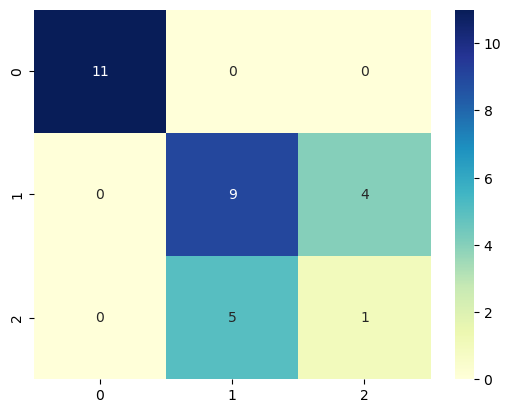

In [140]:
#plotting the heatmap
sns.heatmap(confusion_matrix_2,annot=True,cmap='YlGnBu')
plt.show()

In [141]:
#Accuracy score
ac_2 = accuracy_score(y_test,y_pred_DT_2)
ac_2

0.7

In [143]:
#Classification Report
print('Classification Report')
classification_2 = classification_report(y_test,y_pred_DT_2)
print(classification_2)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.64      0.69      0.67        13
           2       0.20      0.17      0.18         6

    accuracy                           0.70        30
   macro avg       0.61      0.62      0.62        30
weighted avg       0.69      0.70      0.69        30



## --------------------------------------------------------------------------------------------------------------------------------